In [217]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [218]:
!head /Users/prakashghatani/Desktop/Regis/MSDS650/data/movies.dat

1;Toy Story (1995);Animation|Children's|Comedy
2;Jumanji (1995);Adventure|Children's|Fantasy
3;Grumpier Old Men (1995);Comedy|Romance
4;Waiting to Exhale (1995);Comedy|Drama
5;Father of the Bride Part II (1995);Comedy
6;Heat (1995);Action|Crime|Thriller
7;Sabrina (1995);Comedy|Romance
8;Tom and Huck (1995);Adventure|Children's
9;Sudden Death (1995);Action
10;GoldenEye (1995);Action|Adventure|Thriller


In [219]:
# To get the current working directory
!pwd

/Users/prakashghatani


In [220]:
# movie.dat fields --> MovieID::Title::Genres

m_cols = ['movie_id', 'title', 'genres']
movies_df = pd.read_csv('/Users/prakashghatani/Desktop/Regis/MSDS650/data/movies.dat', sep=';', names=m_cols, encoding='latin1')
movies_df.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [221]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [222]:
#Inspect the data to check the first few rows, data types, and summary statistics.
movies_df.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [223]:

# the type of the df object in the data frame
type(movies_df)

pandas.core.frame.DataFrame

In [224]:
# This creates a deep copy of the DataFrame df
movies_df.copy()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [225]:
#Inspect the data to check the first few rows, data types, and summary statistics.
movies_df.describe()

,movie_id
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [226]:
# Check the shape of the dataset
print(f"Dataset shape: {movies_df.shape}")

# Check the column names and data types
print(movies_df.info())

# Check for missing values
print(movies_df.isnull().sum())

Dataset shape: (3883, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
movie_id    0
title       0
genres      0
dtype: int64


In [227]:
#Handle Missing Values to Identify missing values and decide how to handle them (e.g., drop, fill, or interpolate).
movies_df.isnull().sum()
movies_df.dropna()  # or df.fillna(value)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [228]:
#Remove duplicates to check for and remove duplicate rows.
movies_df.duplicated().sum()
movies_df.drop_duplicates()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [229]:
# Showing columns in the Movies dataset
movies_df.columns

Index(['movie_id', 'title', 'genres'], dtype='object')

In [230]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


array([[<Axes: title={'center': 'movie_id'}>]], dtype=object)

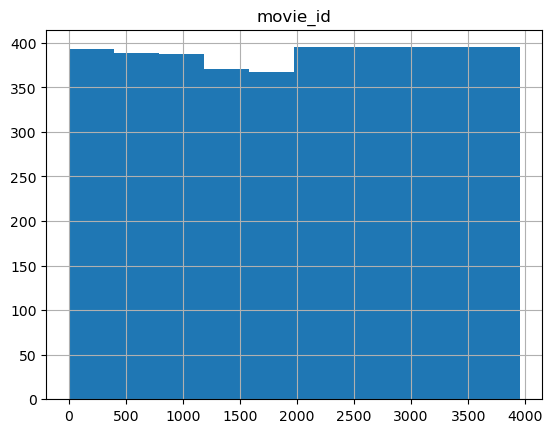

In [231]:
# This method generates histograms for all numerical columns in the DataFrame.
movies_df.hist()

In [232]:
# movie.dat fields --> MovieID::Title::Genres

m_cols = ['movie_id', 'title', 'genres']
movies_df = pd.read_csv('/Users/prakashghatani/Desktop/Regis/MSDS650/data/movies.dat', sep=';', names=m_cols, encoding='latin1')
movies_df.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [233]:
# ratings.dat fields --> MovieID::Title::Genres

m_cols = ['movie_id', 'title', 'genres']
ratings_df = pd.read_csv('/Users/prakashghatani/Desktop/Regis/MSDS650/data/ratings.dat', sep=';', names=m_cols, encoding='latin1')
ratings_df.head(10)

,movie_id,title,genres
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
1,1197,3,978302268
1,1287,5,978302039
1,2804,5,978300719
1,594,4,978302268
1,919,4,978301368


In [234]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000209 entries, 1 to 6040
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   movie_id  1000209 non-null  int64
 1   title     1000209 non-null  int64
 2   genres    1000209 non-null  int64
dtypes: int64(3)
memory usage: 30.5 MB


In [235]:
#Inspect the data to check the first few rows, data types, and summary statistics.
ratings_df.head()

,movie_id,title,genres
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291


In [236]:

# the type of the df object in the data frame
type(ratings_df)

pandas.core.frame.DataFrame

In [237]:
# This creates a deep copy of the DataFrame df
ratings_df.copy()

,movie_id,title,genres
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
...,...,...,...
6040,1091,1,956716541
6040,1094,5,956704887
6040,562,5,956704746
6040,1096,4,956715648


In [238]:
#Inspect the data to check the first few rows, data types, and summary statistics.
ratings_df.describe()

,movie_id,title,genres
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.581564e+00,9.722437e+08
std,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.030000e+03,3.000000e+00,9.653026e+08
50%,1.835000e+03,4.000000e+00,9.730180e+08
75%,2.770000e+03,4.000000e+00,9.752209e+08
max,3.952000e+03,5.000000e+00,1.046455e+09


In [239]:
# Check the shape of the dataset
print(f"Dataset shape: {ratings_df.shape}")

# Check the column names and data types
print(ratings_df.info())

# Check for missing values
print(ratings_df.isnull().sum())

Dataset shape: (1000209, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 1000209 entries, 1 to 6040
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   movie_id  1000209 non-null  int64
 1   title     1000209 non-null  int64
 2   genres    1000209 non-null  int64
dtypes: int64(3)
memory usage: 30.5 MB
None
movie_id    0
title       0
genres      0
dtype: int64


In [240]:
#Handle Missing Values to Identify missing values and decide how to handle them (e.g., drop, fill, or interpolate).
ratings_df.isnull().sum()
ratings_df.dropna()  # or df.fillna(value)

,movie_id,title,genres
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
...,...,...,...
6040,1091,1,956716541
6040,1094,5,956704887
6040,562,5,956704746
6040,1096,4,956715648


In [241]:
#Remove duplicates to check for and remove duplicate rows.
ratings_df.duplicated().sum()
ratings_df.drop_duplicates()

,movie_id,title,genres
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
...,...,...,...
6040,1091,1,956716541
6040,1094,5,956704887
6040,562,5,956704746
6040,1096,4,956715648


In [242]:
# Showing columns in the ratings dataset
ratings_df.columns

Index(['movie_id', 'title', 'genres'], dtype='object')

In [28]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000209 entries, 1 to 6040
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   movie_id  1000209 non-null  int64
 1   title     1000209 non-null  int64
 2   genres    1000209 non-null  int64
dtypes: int64(3)
memory usage: 30.5 MB


array([[<Axes: title={'center': 'movie_id'}>,
        <Axes: title={'center': 'title'}>],
       [<Axes: title={'center': 'genres'}>, <Axes: >]], dtype=object)

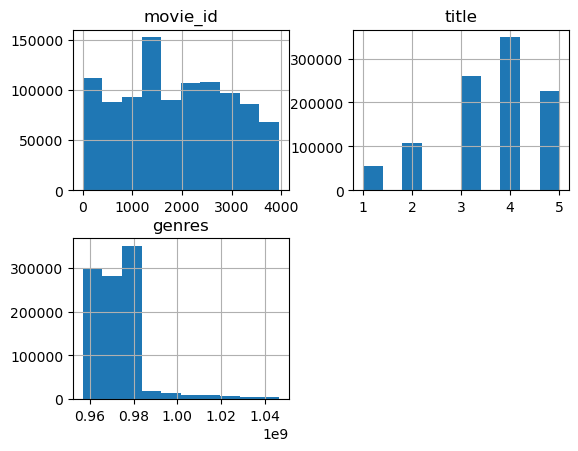

In [243]:
# This method generates histograms for all numerical columns in the DataFrame.
ratings_df.hist()

In [245]:
# ratings.dat fields --> UserID::MovieID::Rating::Timestamp
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df = pd.read_csv('/Users/prakashghatani/Desktop/Regis/MSDS650/data/ratings.dat', sep=';', names=r_cols)
ratings_df.head(10)

,user_id,movie_id,rating,unix_timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [246]:
# ratings.dat fields --> UserID::MovieID::Rating::Timestamp
m_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
users_df = pd.read_csv('/Users/prakashghatani/Desktop/Regis/MSDS650/data/users.dat', sep=';', names=r_cols)
users_df.head(10)

,user_id,movie_id,rating,unix_timestamp
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
6,F,50,9,55117
7,M,35,1,06810
8,M,25,12,11413
9,M,25,17,61614
10,F,35,1,95370


In [247]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 1 to 6040
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         6040 non-null   object
 1   movie_id        6040 non-null   int64 
 2   rating          6040 non-null   int64 
 3   unix_timestamp  6040 non-null   object
dtypes: int64(2), object(2)
memory usage: 235.9+ KB


In [248]:
#Inspect the data to check the first few rows, data types, and summary statistics.
users_df.head()

,user_id,movie_id,rating,unix_timestamp
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455


In [249]:

# the type of the df object in the data frame
type(users_df)

pandas.core.frame.DataFrame

In [250]:
# This creates a deep copy of the DataFrame df
users_df.copy()

,user_id,movie_id,rating,unix_timestamp
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706
6039,F,45,0,01060


In [251]:
#Inspect the data to check the first few rows, data types, and summary statistics.
users_df.describe()

,movie_id,rating
count,6040.000000,6040.000000
mean,30.639238,8.146854
std,12.895962,6.329511
min,1.000000,0.000000
25%,25.000000,3.000000
50%,25.000000,7.000000
75%,35.000000,14.000000
max,56.000000,20.000000


In [252]:
# Check the shape of the dataset
print(f"Dataset shape: {users_df.shape}")

# Check the column names and data types
print(users_df.info())

# Check for missing values
print(users_df.isnull().sum())

Dataset shape: (6040, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 1 to 6040
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         6040 non-null   object
 1   movie_id        6040 non-null   int64 
 2   rating          6040 non-null   int64 
 3   unix_timestamp  6040 non-null   object
dtypes: int64(2), object(2)
memory usage: 235.9+ KB
None
user_id           0
movie_id          0
rating            0
unix_timestamp    0
dtype: int64


In [253]:
#Handle Missing Values to Identify missing values and decide how to handle them (e.g., drop, fill, or interpolate).
users_df.isnull().sum()
users_df.dropna()  # or df.fillna(value)

,user_id,movie_id,rating,unix_timestamp
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706
6039,F,45,0,01060


In [254]:
#Remove duplicates to check for and remove duplicate rows.
users_df.duplicated().sum()
users_df.drop_duplicates()

,user_id,movie_id,rating,unix_timestamp
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706
6039,F,45,0,01060


In [255]:
# Showing columns in the users dataset
users_df.columns

Index(['user_id', 'movie_id', 'rating', 'unix_timestamp'], dtype='object')

In [41]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 1 to 6040
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         6040 non-null   object
 1   movie_id        6040 non-null   int64 
 2   rating          6040 non-null   int64 
 3   unix_timestamp  6040 non-null   object
dtypes: int64(2), object(2)
memory usage: 235.9+ KB


array([[<Axes: title={'center': 'movie_id'}>,
        <Axes: title={'center': 'rating'}>]], dtype=object)

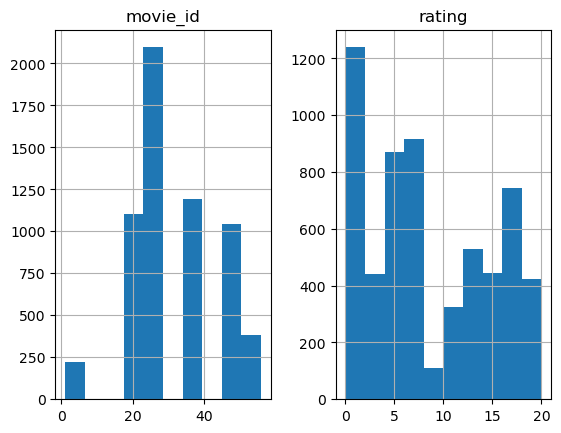

In [256]:
# This method generates histograms for all numerical columns in the DataFrame.
users_df.hist()

In [257]:
# users.dat fields --> UserID::Gender::Age::Occupation::Zip-code
u_cols = ['user_id','sex', 'age', 'occupation', 'zip_code']
users_df = pd.read_csv('/Users/prakashghatani/Desktop/Regis/MSDS650/data/users.dat', sep=';', names=u_cols)
users_df.head(10)

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [258]:
# merge movies_df with ratings_df
movie_ratings_df = pd.merge(movies_df, ratings_df)

# now movies_ratings_df with users_df
lens_df = pd.merge(movie_ratings_df, users_df)
lens_df.head(30)

,movie_id,title,genres,user_id,rating,unix_timestamp,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370
5,1,Toy Story (1995),Animation|Children's|Comedy,18,4,978154768,F,18,3,95825
6,1,Toy Story (1995),Animation|Children's|Comedy,19,5,978555994,M,1,10,48073
7,1,Toy Story (1995),Animation|Children's|Comedy,21,3,978139347,M,18,16,99353
8,1,Toy Story (1995),Animation|Children's|Comedy,23,4,978463614,M,35,0,90049
9,1,Toy Story (1995),Animation|Children's|Comedy,26,3,978130703,M,25,7,23112


In [259]:
# It provides a summary of the DataFrame.
lens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   movie_id        1000209 non-null  int64 
 1   title           1000209 non-null  object
 2   genres          1000209 non-null  object
 3   user_id         1000209 non-null  int64 
 4   rating          1000209 non-null  int64 
 5   unix_timestamp  1000209 non-null  int64 
 6   sex             1000209 non-null  object
 7   age             1000209 non-null  int64 
 8   occupation      1000209 non-null  int64 
 9   zip_code        1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [260]:
# This is used to save dataframe
lens_df.to_csv('movie_lens_merged.csv',index=False)

# Info() and shape functions are essential in data analysis, especially for DataFrames in Python's pandas library.
# A thorough overview of the DataFrame, including data types, non-null counts, and memory utilization, is provided by info().
# Info() provides a summary of a DataFrame, 
# Shape provides a succinct overview of the DataFrame's dimensions (rows and columns).
# while shape returns its dimensions.
# Both are necessary to comprehend the quality and structure of your data, which is necessary for efficient preprocessing and data analysis.

# The lens_df.info() function provides information on the DataFrame's number of rows and columns, column names and data types, non-null values in each column, and memory usage.

# The function lens_df.shape returns a tuple in the format (rows, columns), such as (100, 5) for a matrix with 100 rows and 5 columns.

# DataFrames help with data type awareness, missing value detection, and performance optimization by revealing memory utilization 
# and supporting preprocessing and data cleaning.

# With giant datasets in particular, the size of the dataset helps predict performance problems. 
# validates the data, and provides insight into the extent of the data.

In [261]:
# Example usage of info() and shape

# info()
print("Info about lens_df:")
lens_df.info()

# shape()
print("\nShape of lens_df:")
print(lens_df.shape)

Info about lens_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   movie_id        1000209 non-null  int64 
 1   title           1000209 non-null  object
 2   genres          1000209 non-null  object
 3   user_id         1000209 non-null  int64 
 4   rating          1000209 non-null  int64 
 5   unix_timestamp  1000209 non-null  int64 
 6   sex             1000209 non-null  object
 7   age             1000209 non-null  int64 
 8   occupation      1000209 non-null  int64 
 9   zip_code        1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB

Shape of lens_df:
(1000209, 10)


In [262]:
# Calculate the average rating for each movie
avg_ratings = lens_df.groupby('movie_id')['rating'].mean()

# Find the movie(s) with the highest average rating
highest_avg_rating = avg_ratings.idxmax()
highest_avg_movies = lens_df[lens_df['movie_id'] == highest_avg_rating]['movie_id'].unique()

# Find the movie(s) with the lowest average rating
lowest_avg_rating = avg_ratings.idxmin()
lowest_avg_movies = lens_df[lens_df['movie_id'] == lowest_avg_rating]['movie_id'].unique()

print("Movie(s) with the highest average rating:", highest_avg_movies)
print("Movie(s) with the lowest average rating:", lowest_avg_movies)


Movie(s) with the highest average rating: [787]
Movie(s) with the lowest average rating: [127]


In [263]:
# Count the number of ratings for each movie
rating_counts = lens_df.groupby('movie_id')['rating'].count()

# Find the movie(s) with the most ratings
most_ratings = rating_counts.idxmax()
most_rated_movies = lens_df[lens_df['movie_id'] == most_ratings]['movie_id'].unique()

print("Movie(s) with the most ratings:", most_rated_movies)

Movie(s) with the most ratings: [2858]


In [264]:
# Count the number of ratings given by each user
user_rating_counts = lens_df.groupby('user_id')['rating'].count()

# Sort users by the number of ratings in descending order and get the top 10
top_10_users = user_rating_counts.sort_values(ascending=False).head(10)

print("Top 10 users who have rated the most movies:")
print(top_10_users)

Top 10 users who have rated the most movies:
user_id
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: rating, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   movie_id        1000209 non-null  int64 
 1   title           1000209 non-null  object
 2   genres          1000209 non-null  object
 3   user_id         1000209 non-null  int64 
 4   rating          1000209 non-null  int64 
 5   unix_timestamp  1000209 non-null  int64 
 6   sex             1000209 non-null  object
 7   age             1000209 non-null  int64 
 8   occupation      1000209 non-null  int64 
 9   zip_code        1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


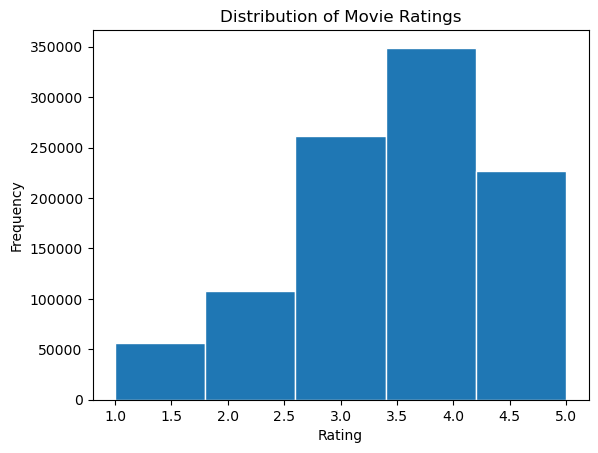

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


,Rating,Count
0,4,348971
1,3,261197
2,5,226310
3,2,107557
4,1,56174


In [265]:
# The information of DataFrame
lens_df.info()

# Histogram of ratings
plt.hist(lens_df['rating'], bins=5, edgecolor='white')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print(lens_df['rating'].describe())

# Conditional formatting: Highlight the most frequent rating
rating_counts = lens_df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']
rating_counts.style.apply(lambda x: ['background-color: yellow' if x['Count'] == rating_counts['Count'].max() else '' for i in x], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   movie_id        1000209 non-null  int64 
 1   title           1000209 non-null  object
 2   genres          1000209 non-null  object
 3   user_id         1000209 non-null  int64 
 4   rating          1000209 non-null  int64 
 5   unix_timestamp  1000209 non-null  int64 
 6   sex             1000209 non-null  object
 7   age             1000209 non-null  int64 
 8   occupation      1000209 non-null  int64 
 9   zip_code        1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


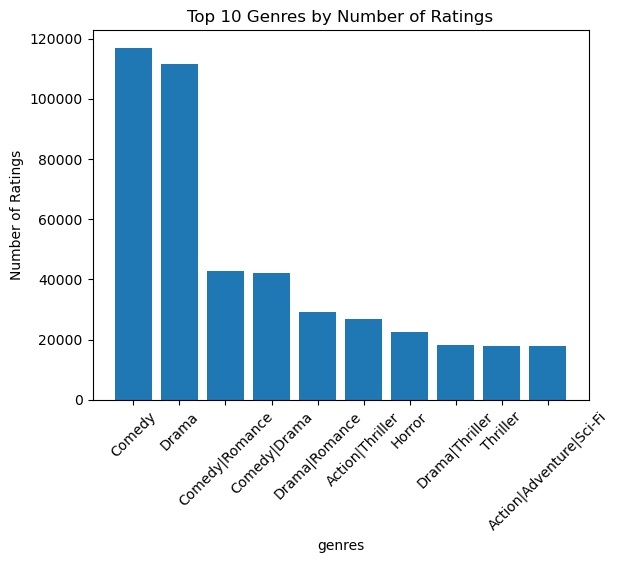

In [266]:
# The information of DataFrame
lens_df.info()

# Drop rows with missing genre data
lens_df = lens_df.dropna(subset=['genres'])

# Group by genre and count ratings
genres_ratings = lens_df.groupby('genres')['rating'].agg(['count', 'mean']).reset_index()

# Bar plot of top 10 genres by rating count
top_10_genres = genres_ratings.nlargest(10, 'count')
plt.bar(top_10_genres['genres'], top_10_genres['count'])
plt.title('Top 10 Genres by Number of Ratings')
plt.xlabel('genres')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

In [267]:
lens_df.head()

,movie_id,title,genres,user_id,rating,unix_timestamp,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [268]:
lens_df.info()
# Conditional formatting in a dataframe of Gender
def return_gender(sex):
    if sex == 'male':
        return 0
    elif sex  == 'female':
        return 1
    else:
        return -999

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   movie_id        1000209 non-null  int64 
 1   title           1000209 non-null  object
 2   genres          1000209 non-null  object
 3   user_id         1000209 non-null  int64 
 4   rating          1000209 non-null  int64 
 5   unix_timestamp  1000209 non-null  int64 
 6   sex             1000209 non-null  object
 7   age             1000209 non-null  int64 
 8   occupation      1000209 non-null  int64 
 9   zip_code        1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [269]:

lens_df = df.copy()  # Ensure lens_df is a copy of dataframe
lens_df['gender'] = df['sex'].apply(return_gender)

In [270]:
# Verify that the function worked properly after applying it:
print(lens_df['gender'].value_counts(dropna=False))


gender
0    577
1    314
Name: count, dtype: int64


In [271]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [272]:
lens_df['fare'] # This fare calculate the sum and mean of aggregate function


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [273]:
lens_df['fare'].agg( ['sum', 'mean'] ) # Aggregate function of Fare(Sum and mean)

sum     28693.949300
mean       32.204208
Name: fare, dtype: float64

In [274]:
lens_df.agg({'fare': ['sum', 'mean'], 'age': 'count'})

,fare,age
sum,28693.949300,NaN
mean,32.204208,NaN
count,NaN,714.0


In [275]:
# Group by 'Category' and calculate the sum
grouped = lens_df.groupby('fare').sum()

print(grouped)

          survived  pclass                                                sex  \
fare                                                                            
0.0000           1      29  malemalemalemalemalemalemalemalemalemalemalema...   
4.0125           0       3                                               male   
5.0000           0       1                                               male   
6.2375           0       3                                               male   
6.4375           0       3                                               male   
...            ...     ...                                                ...   
227.5250         3       4                             femalemalefemalefemale   
247.5208         1       2                                         malefemale   
262.3750         2       2                                       femalefemale   
263.0000         2       4                               malefemalefemalemale   
512.3292         3       3  

In [276]:
# Using the unique values in the embarked column, groupby(['embarked']) groups the DataFrame. A distinct value in the embarked column is associated with each group.

# agg({'fare': ['sum','mean']}): The fare column inside each group is subjected to aggregating functions. Specifically:

# 'sum': Determines the sum of the fare columns for every group.

lens_df.groupby(['embarked']).agg( {'fare':['sum', 'mean']} )

fare           
                 sum       mean
embarked                       
C         10072.2962  59.954144
Q          1022.2543  13.276030
S         17439.3988  27.079812

In [277]:

# The DataFrame is grouped by the embarked column using groupby(['embarked']).
# The grouped data is aggregated by the agg() function.
# fare_sum=('fare', lambda x: x.sum()): The fare column sum for each group is stored in a new column called fare_sum.
# fare_mean=('fare', lambda x: x.mean()): The fare column mean for each group is stored in a new column called fare_mean
# fare_count=('fare', lambda x: x.count()): The fare column mean for each group is stored in a new column called fare_count.

result = lens_df.groupby(['embarked']).agg(
    fare_sum=('fare', lambda x: x.sum()),
    fare_mean=('fare', lambda x: x.mean()),
    fare_count=('fare', lambda x: x.count())
    
    
)

print(result)

            fare_sum  fare_mean  fare_count
embarked                                   
C         10072.2962  59.954144         168
Q          1022.2543  13.276030          77
S         17439.3988  27.079812         644
